In [30]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
# read the csv file into a pandas dataFrame after cleanins
# original dataset too big for github
ev_model = pd.read_csv('Data/CSV/WA_EV_byMonthYear.csv')
ev_model['MonthYearDate'] = pd.to_datetime(ev_model['MonthYear'])
ev_model.head()
# ev_model.shape()

,MonthYear,Number_of_EV,MonthYearDate
0,2020-01,2581,2020-01-01
1,2019-10,2232,2019-10-01
2,2019-01,2218,2019-01-01
3,2018-10,2143,2018-10-01
4,2018-11,2064,2018-11-01


In [86]:
ev_model['minDate'] = ev_model['MonthYearDate'].min()
ev_model['DateDelta'] = (ev_model['MonthYearDate'] - ev_model['minDate']) / np.timedelta64(1, 'M')
ev_model['DateDelta'] = ev_model['DateDelta'].round(0)
ev_model.head()

,MonthYear,Number_of_EV,MonthYearDate,minDate,DateDelta
0,2020-01,2581,2020-01-01,2010-02-01,119.0
1,2019-10,2232,2019-10-01,2010-02-01,116.0
2,2019-01,2218,2019-01-01,2010-02-01,107.0
3,2018-10,2143,2018-10-01,2010-02-01,104.0
4,2018-11,2064,2018-11-01,2010-02-01,105.0


In [87]:
# assign data to X and y and reshape data to 2-d array for Sklearn
X = ev_model.DateDelta.values.reshape(-1, 1)
y = ev_model.Number_of_EV.values.reshape(-1,1)
# check data df shape
print("DF shape: ", X.shape, y.shape)

DF shape:  (132, 1) (132, 1)


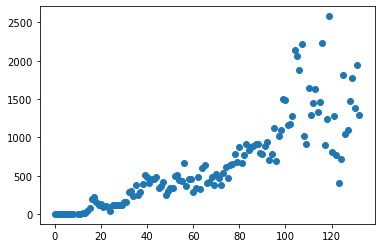

In [88]:
# plot the data
plt.scatter(X, y)

In [89]:
# Create the model and fit the model to the data
from sklearn.linear_model import LinearRegression
# begin to build model
model = LinearRegression()

In [90]:
X[0][0]

119.0

In [91]:
#  fit the model to the data
model.fit(X, y)

LinearRegression()

In [92]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[12.69069464]]
y-axis intercept:  [-173.76288851]


In [100]:
# 
x_min = [[(pd.to_datetime('2017-02-01')-ev_model.minDate.min())/ np.timedelta64(1, 'M')]]
x_max = [[(pd.to_datetime('2030-01-01')-ev_model.minDate.min()) / np.timedelta64(1, 'M')]]
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[84.00993860243537]]
Max X Value: [[238.98642682601286]]


In [101]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

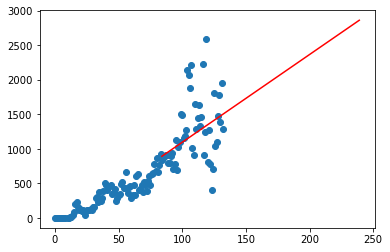

In [102]:
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')